In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Cargar el Dataset

In [75]:
dataset = pd.read_csv('/content/datos.csv')

In [76]:
# Mostrar las primeras filas
#display(dataset.head())
dataset

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [77]:
sleeper = dataset['Sleep Duration'].unique()
sleeper

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

In [78]:
# Información general del dataset
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

None

In [79]:
# Saber número de filas
dataset.shape[0]

27901

3. Procesamiento de datos

In [80]:
# Renombrar columnas a español
dataset.rename(columns={
    'id': 'Identificación',
    'Gender': 'Género',
    'Age': 'Edad',
    'City': 'Ciudad',
    'Profession': 'Profesión',
    'Academic Pressure': 'Presión académica',
    'Work Pressure': 'Presión laboral',
    'CGPA': 'Promedio general de calificaciones (GPA)',
    'Study Satisfaction': 'Satisfacción con el estudio',
    'Job Satisfaction': 'Satisfacción laboral',
    'Sleep Duration': 'Duración del sueño',
    'Dietary Habits': 'Hábitos alimentarios',
    'Degree': 'Grado',
    'Have you ever had suicidal thoughts ?': '¿Alguna vez has tenido pensamientos suicidas?',
    'Work/Study Hours': 'Horas de trabajo/estudio',
    'Financial Stress': 'Estrés financiero',
    'Family History of Mental Illness': 'Antecedentes familiares de enfermedad mental',
    'Depression': 'Depresión'
}, inplace=True)


In [81]:
# Mapeo de categorías a valores numéricos en horas
sleep_mapping = {
    'Less than 5 hours': 4,    # Se asume 4 horas como promedio
    '5-6 hours': 5.5,          # Promedio entre 5 y 6 horas
    '7-8 hours': 7.5,          # Promedio entre 7 y 8 horas
    'More than 8 hours': 9,    # Se asume 9 horas como referencia
    'Others': None             # No se puede asignar un valor específico
}

# Convertir la columna según el mapeo
dataset['Duración del sueño'] = dataset['Duración del sueño'].map(sleep_mapping)

In [82]:
# Convertir la columna 'Duración del sueño' a valores numéricos
'''def convertir_sueño(valor):
    if isinstance(valor, str):
        numeros = [int(s) for s in valor.split() if s.isdigit()]
        if len(numeros) == 2:
            return np.mean(numeros)
        elif len(numeros) == 1:
            return numeros[0]
    return np.nan

dataset['Duración del sueño'] = dataset['Duración del sueño'].apply(convertir_sueño)'''

"def convertir_sueño(valor):\n    if isinstance(valor, str):\n        numeros = [int(s) for s in valor.split() if s.isdigit()]\n        if len(numeros) == 2:\n            return np.mean(numeros)\n        elif len(numeros) == 1:\n            return numeros[0]\n    return np.nan\n\ndataset['Duración del sueño'] = dataset['Duración del sueño'].apply(convertir_sueño)"

In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Aplicar LabelEncoder a las columnas categóricas
dataset['Género'] = le.fit_transform(dataset['Género'])
dataset['¿Alguna vez has tenido pensamientos suicidas?'] = le.fit_transform(dataset['¿Alguna vez has tenido pensamientos suicidas?'])
dataset['Antecedentes familiares de enfermedad mental'] = le.fit_transform(dataset['Antecedentes familiares de enfermedad mental'])

<ipython-input-84-6188a8ebd3f2>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




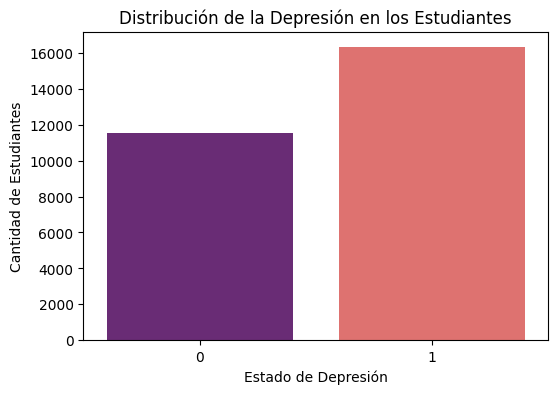

In [84]:
# Ver distribución de la variable objetivo en este caso 'Depresión'
plt.figure(figsize=(6,4))
sns.countplot(x='Depresión', data=dataset, palette='magma')
plt.title('Distribución de la Depresión en los Estudiantes')
plt.xlabel('Estado de Depresión')
plt.ylabel('Cantidad de Estudiantes')
plt.show()

3. Identificación de Indicadores Clave

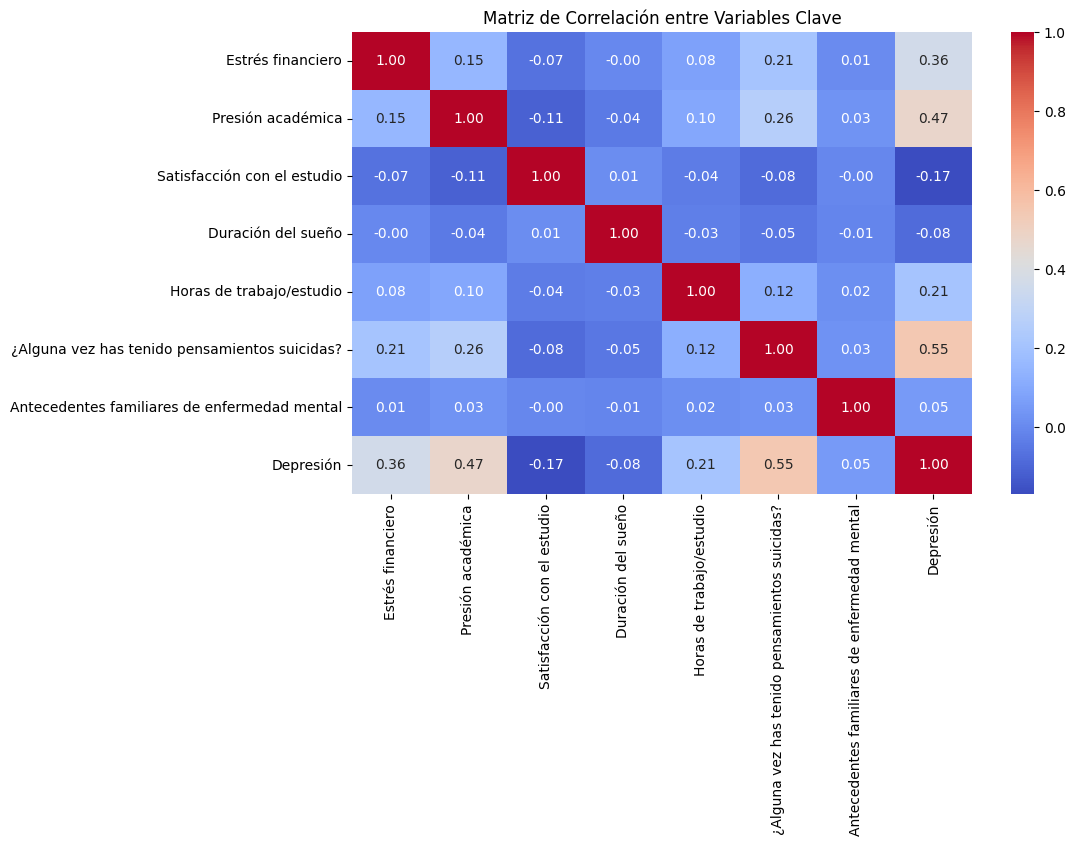

In [85]:
definir_indicadores = dataset[['Estrés financiero', 'Presión académica', 'Satisfacción con el estudio',
                               'Duración del sueño', 'Horas de trabajo/estudio',
                               '¿Alguna vez has tenido pensamientos suicidas?',
                               'Antecedentes familiares de enfermedad mental', 'Depresión']]

# Matriz de correlación para detectar relaciones entre variables
plt.figure(figsize=(10,6))
sns.heatmap(definir_indicadores.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Clave')
plt.show()

In [86]:
import plotly.express as px

fig = px.scatter(dataset, x='Satisfacción con el estudio', y='Presión académica',
                 title='Comparación de Satisfacción con el Estudio y Presión Académica',
                 labels={'Satisfacción con el estudio': 'Satisfacción con el Estudio',
                         'Presión académica': 'Presión Académica'},
                 color='Depresión',
                 hover_data=['Edad', 'Género'])

fig.show()

In [87]:
import plotly.express as px

fig = px.pie(dataset, names='Satisfacción con el estudio',
             title='Distribución de Satisfacción con el Estudio',
             hole=0.3,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [88]:
dataset.isna().sum()

,0
Identificación,0
Género,0
Edad,0
Ciudad,0
Profesión,0
Presión académica,0
Presión laboral,0
Promedio general de calificaciones (GPA),0
Satisfacción con el estudio,0
Satisfacción laboral,0


In [89]:
m_d = dataset['Duración del sueño'].mean#sacando la media del la columna duración del sueño y sustituir por los valores nulos
dataset['Duración del sueño'].fillna(m_d, inplace=True)

E_f = dataset['Estrés financiero'].mean()
dataset['Estrés financiero'].fillna(E_f, inplace=True)

<ipython-input-89-717f1ba29e3b>:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0        5.5
1        5.5
2        4.0
3        7.5
4        5.5
        ... 
27896    5.5
27897    4.0
27898    5.5
27899    4.0
27900    4.0
Name: Duración del sueño, Length: 27901, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

<ipython-input-89-717f1ba29e3b>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation i

In [90]:
dataset.isna().sum()

,0
Identificación,0
Género,0
Edad,0
Ciudad,0
Profesión,0
Presión académica,0
Presión laboral,0
Promedio general de calificaciones (GPA),0
Satisfacción con el estudio,0
Satisfacción laboral,0


In [91]:
dataset.duplicated().sum()

np.int64(0)

In [98]:
dataset = pd.get_dummies(dataset, columns=dataset.columns[dataset.dtypes == 'object'])
dataset.head()

,Identificación,Género,Edad,Presión académica,Presión laboral,Promedio general de calificaciones (GPA),Satisfacción con el estudio,Satisfacción laboral,¿Alguna vez has tenido pensamientos suicidas?,Horas de trabajo/estudio,...,Grado_MA,Grado_MBA,Grado_MBBS,Grado_MCA,Grado_MD,Grado_ME,Grado_MHM,Grado_MSc,Grado_Others,Grado_PhD
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,False,False,False,False,False,False,False,False,False,False
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,False,False,False,False,False,False,False,False,False,False
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,False,False,False,False,False,False,False,False,False,False
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,False,False,False,False,False,False,False,False,False,False
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,False,False,False,False,False,False,False,False,False,False


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve

In [100]:
x = dataset.drop('Depresión', axis=1)
y = dataset['Depresión']

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [102]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((22320, 115), (5581, 115), (22320,), (5581,))

In [104]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [147]:
y_pred = lg.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [141]:
score = accuracy_score(y_test,y_pred)
score

0.8070238308546855

In [142]:
mc = confusion_matrix(y_test,y_pred)
mc

array([[1736,  607],
       [ 470, 2768]])

In [143]:
predict = classification_report(y_test,y_pred)
print(predict)

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      2343
           1       0.82      0.85      0.84      3238

    accuracy                           0.81      5581
   macro avg       0.80      0.80      0.80      5581
weighted avg       0.81      0.81      0.81      5581



In [160]:
pred = (y_pred > 0.3).astype(int)
pred

array([0, 0, 0, ..., 1, 0, 1])

In [161]:
d_pred = pd.DataFrame({'y_test':y_test,'y_pred':pred})
d_pred.sort_values(by='y_pred',ascending=False)

,y_test,y_pred
7780,1,1
22028,1,1
8710,0,1
7510,1,1
8765,1,1
...,...,...
22097,0,0
16266,0,0
25459,1,0
7952,0,0
